----
# Kolokwium 1
----

In [13]:
%matplotlib inline
import sympy as sp
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12, 8)

----
## Zadanie 0
----
Proszę przypisać wartości zmiennych
- imie_i_nazwisko,
- numer_indeksu,
- numer_grupy_lab,


oraz obliczyć wartość zmiennej *N*

In [14]:
imie_i_nazwisko = "Jan Piętka"
numer_indeksu = 159945
numer_grupy_lab = 1

N = numer_indeksu % 6
print(f'Twoja liczba N to {N}')

Twoja liczba N to 3


----
## Zadanie 1. Charakterystyki układów
----
Proszę wyznaczyć i wykreślić charakterystyki amplitudową oraz fazową układu o podanej transmitacji.

Porszę wyznaczyć i wykreślić odpowiedź impulsową tego układu.

Proszę pamiętać o odpowiednim opisie osi na wykresach.

$$ H(s) = {{(N+1)s + 1} \over {2s^2 + s + N+5}} $$



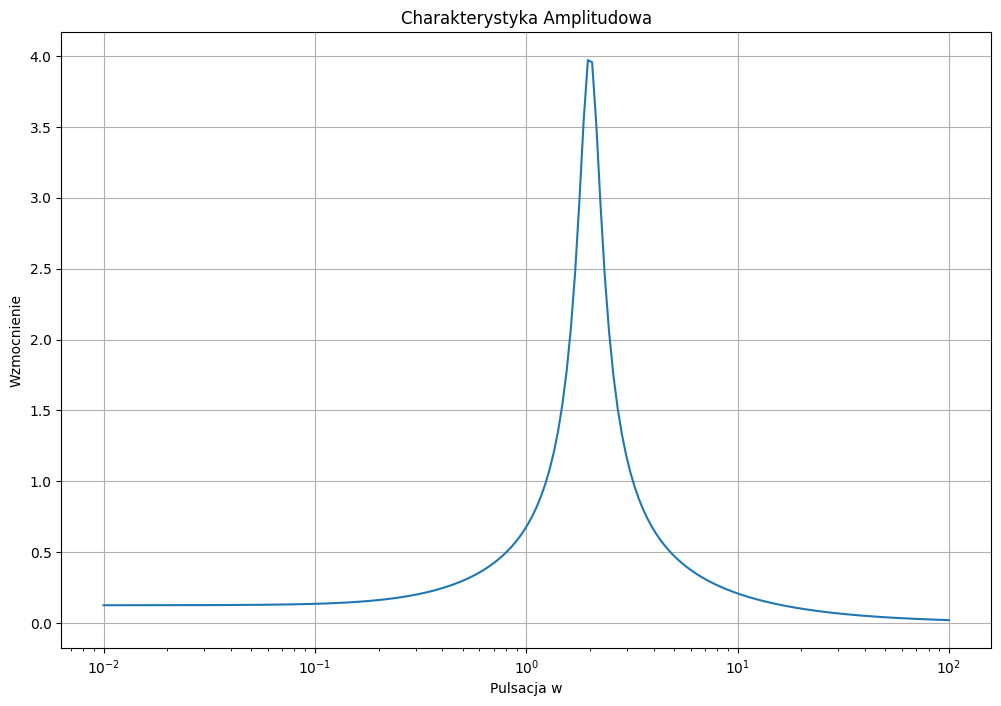

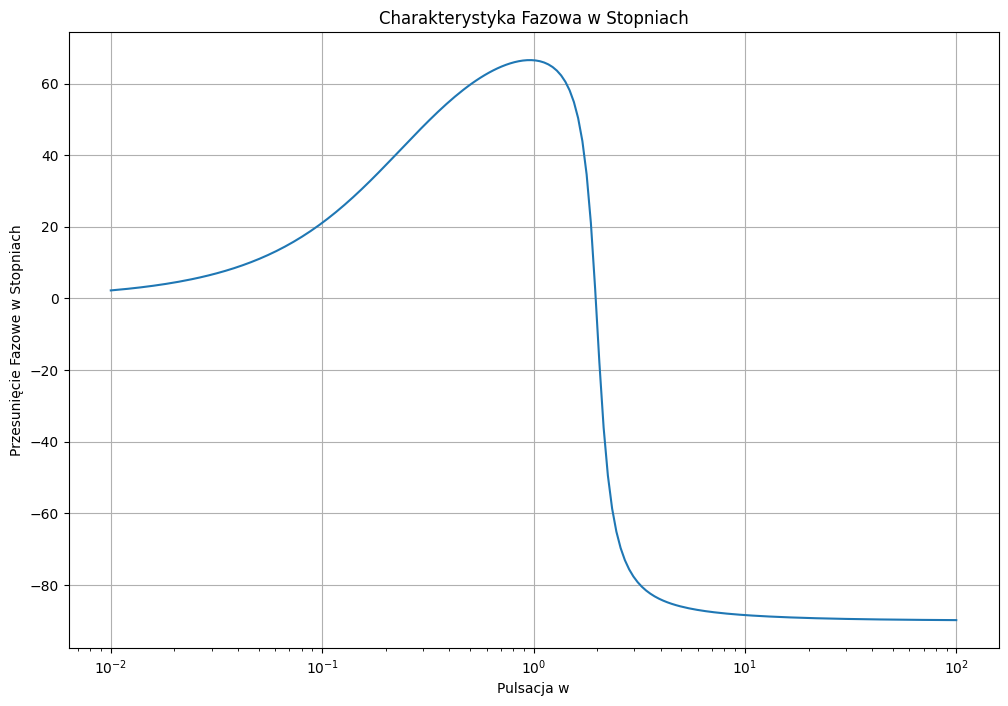

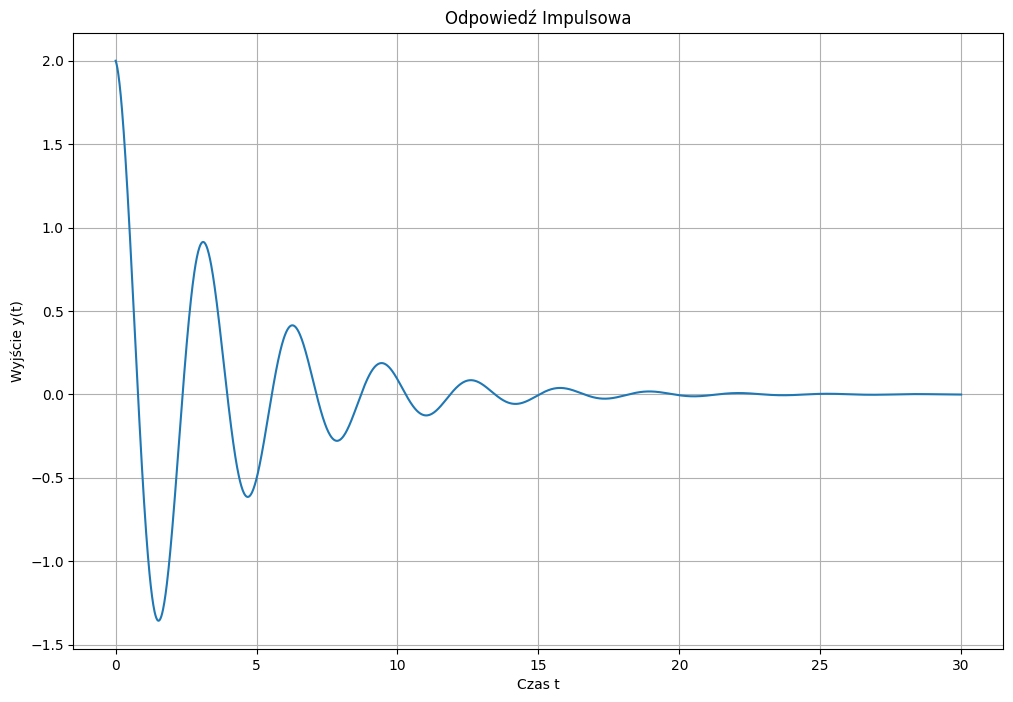

In [15]:
# Harakterystyka Amplitudowa i Fazowa Numerycznie
licznik = np.poly1d([4, 1])
mianownik = np.poly1d([2, 1, 8])

probki_w = np.logspace(-2, 2, 200)
transmitancja = np.polyval(licznik, 1j*probki_w) / np.polyval(mianownik, 1j*probki_w)
charakterystyka_amplitudowa = np.abs(transmitancja)
charakterystyka_fazowa = np.angle(transmitancja, deg=True)

plt.semilogx(probki_w, charakterystyka_amplitudowa)
plt.title("Charakterystyka Amplitudowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Wzmocnienie")
plt.grid()
plt.show()
plt.semilogx(probki_w, charakterystyka_fazowa)
plt.title("Charakterystyka Fazowa w Stopniach")
plt.xlabel("Pulsacja w")
plt.ylabel("Przesunięcie Fazowe w Stopniach")
plt.grid()
plt.show()


# Odpowiedź Impulsowa Układu Numerycznie
probki_t = np.linspace(0, 30, 2000)
odpowiedz_impulsowa = scipy.signal.impulse(scipy.signal.tf2ss(licznik, mianownik), T=probki_t)[1]
plt.plot(probki_t, odpowiedz_impulsowa)
plt.title("Odpowiedź Impulsowa")
plt.xlabel("Czas t")
plt.ylabel("Wyjście y(t)")
plt.grid()
plt.show()


----
## Zadanie 2. Stabilność i minimalnofazowość
----
Proszę określić, czy układ o podanej transmitancji jest stabilny w sensie BIBO i minimalnofazowy

$$ H(s)={{s^6+5s^5+7s^4+2Ns^3+s^2+2} \over {s^2+(0,5N+1)s+3}} $$

In [16]:
licznik = np.poly1d([1, 5, 7, 6, 1, 0, 2])
mianownik = np.poly1d([1, 2.5, 3])

zera = np.roots(licznik)
bieguny = np.roots(mianownik)

stabilnosc_BIBO = 1
stabilnosc_Minimalnofazowa = 1

for zero in zera:
    if (zero.real > 0):
        stabilnosc_Minimalnofazowa = 0
        break

for biegun in bieguny:
    if (biegun.real >= 0):
        stabilnosc_BIBO = 0
        stabilnosc_Minimalnofazowa = 0
        break
    
if (stabilnosc_BIBO == 1):
    print("Układ jest stabilny w sensie BIBO.")
else:
    print("Układ nie jest stabilny w sensie BIBO.")

if (stabilnosc_Minimalnofazowa == 1):
    print("Układ jest stabilny w sensie minimalnofazowym.")
else:
    print("Układ nie jest stabilny w sensie minimalnofazowym.")

Układ jest stabilny w sensie BIBO.
Układ nie jest stabilny w sensie minimalnofazowym.


----
## Zadanie 3. Określanie wzorów i wartosci funkcji
----
![alt text](figures.png)


Proszę zdefiniować wzór funkcji numer `N` w odpowiednim przedziale (używając `sympy.Piecewise`), uzależniając go od zmiennej `T`.

Proszę zdefiniować wektor czasów dla danego przedziału (składający się z przynajmniej 200 elementów) oraz wyliczyć wektor próbek funkcji w tym przedziale (używając `sympy.lambdify`). Początkowo za `T` proszę przyjąć wartość 1.

Proszę wykreślić przebieg funkcji na wykresie. Proszę opisać osie wykresu.

Ostatecznie za `T` proszę podstawić sumę cyfr swojego numeru indeksu i ponownie uruchomić skrypt. Kształt przebiegu w ramach okresu nie powinien się zmienić.

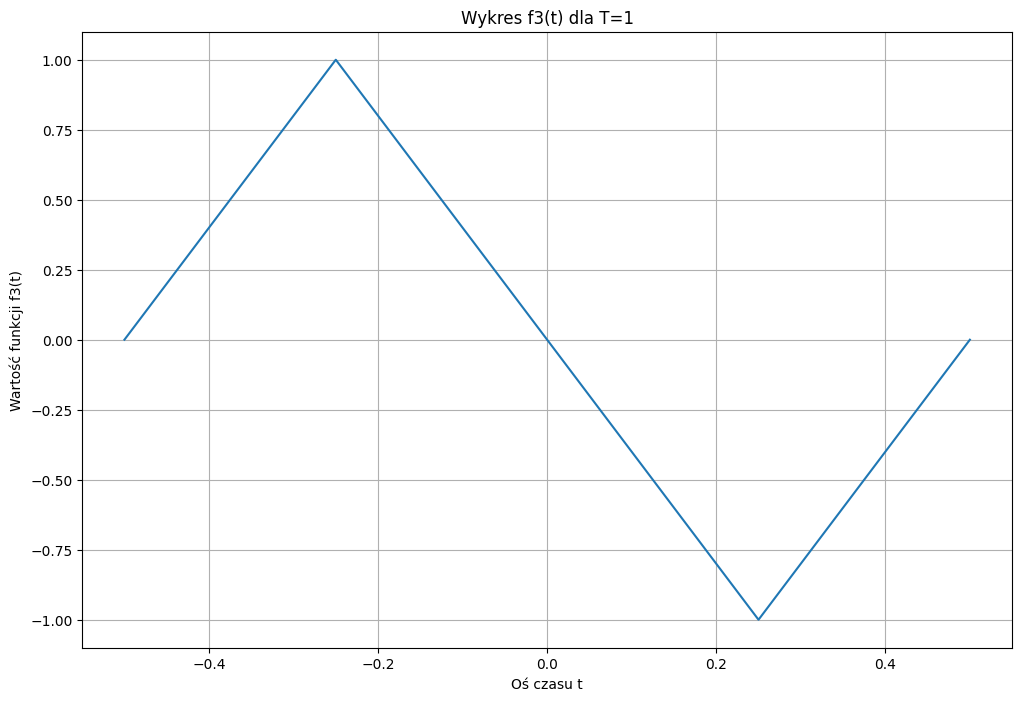

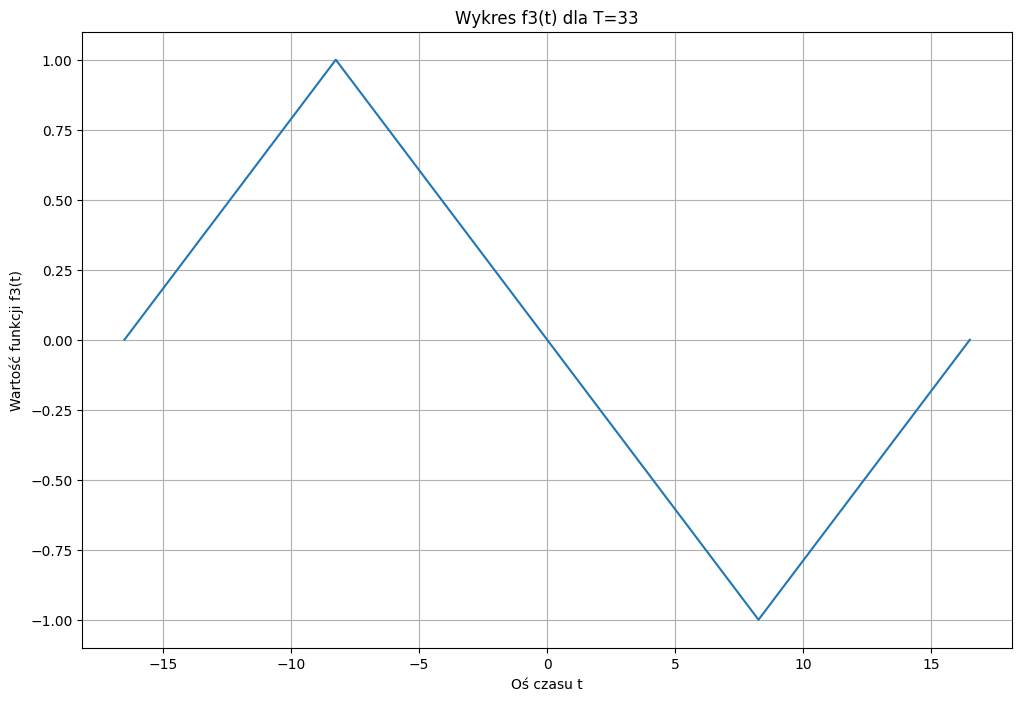

In [17]:
t = sp.Symbol('t', real = 'True', nonzero = 'True')

NumberOfSamples = 1001
T = 1
f3 = sp.Piecewise(((4/T)*t+2, t<-T/4), ((-4/T)*t, (t>=-T/4)&(t<T/4)), ((4/T)*t-2, t>=T/4))
probki_t = np.linspace(-T/2, T/2, NumberOfSamples)
plt.plot(probki_t, sp.lambdify(t, f3)(probki_t))
plt.title("Wykres f3(t) dla T=1")
plt.xlabel("Oś czasu t")
plt.ylabel("Wartość funkcji f3(t)")
plt.grid()
plt.show()

NumberOfSamples = 1001
T = 33
f3 = sp.Piecewise(((4/T)*t+2, t<-T/4), ((-4/T)*t, (t>=-T/4)&(t<T/4)), ((4/T)*t-2, t>=T/4))
probki_t = np.linspace(-T/2, T/2, NumberOfSamples)
plt.plot(probki_t, sp.lambdify(t, f3)(probki_t))
plt.title("Wykres f3(t) dla T=33")
plt.xlabel("Oś czasu t")
plt.ylabel("Wartość funkcji f3(t)")
plt.grid()
plt.show()

----
## Zadanie 4. Wyznaczanie współczynników szeregu Fouriera (analityczne)
----

$$ f(t) = \sum_{k=-\infty}^{\infty} F_k e^{j k {{2 \pi } \over T } t} \text{   for:   } k \in \mathbb{C} $$

$$ F_0 = { 1 \over T } \int\limits_{T}f(t)dt  $$

$$ F_k = { 1 \over T } \int\limits_{T} f(t) e^{-jkt {2\pi \over T}} dt \text{   for:   } k \in \mathbb{C}, k \neq 0 $$

Dany jest jeden okres sygnału zdefiniowany jako `foo`.

Na podstawie powyższych wzorów proszę zdefiniować funkcję wyznaczającą wyrażenia na współczynniki szeregu Fouriera w postaci symbolicznej.
Podpowieź: przydatne funkcje `sympy.exp`, `sympy.simplify`, `sympy.integrate`

Wykorzystując zdefiniowaną funkcję, proszę obliczyć i wyświetlić wyrażenia na współczynniki szeregu Fouriera funkcji `foo`. Proszę zwrócić uwagę na granice całkowania.

Proszę wyznaczyć implementację numeryczną wyrażenia na współczynniki szeregu Fouriera, wyliczyć i wyświetlić wartości współczynników o indeksach od `-N-7` do `N+7` włącznie.

Proszę wyliczyć i przedstawić na wykresach prążkowych (`plt.stem`) amplitudy i fazy wyliczonych współczynników.

*Dla wybitnych:* Proszę dowolnym sposobem wyznaczyć i narysować rekonstrukcję sygnału na podstawie wyżej wyznaczonych współczynników (od `-N-7` do `N+7` włacznie)

F0:


-1.00000000000000

Fk:


-2.0*I*exp(0.5*I*pi*k)/(pi*k) + 1.5*I*exp(I*pi*k)/(pi*k) - 1.5*I*exp(-I*pi*k)/(pi*k) + 2.0*I*exp(-0.5*I*pi*k)/(pi*k)

Wartości Współczynników od k=-10 do k=10


[(1.949085916259688e-16+0j),
 (0.1414710605261291+2.651645098249609e-18j),
 (3.898171832519377e-17+0j),
 (-0.18189136353359478-2.6516450982496153e-18j),
 (1.949085916259688e-16-1.3877787807814457e-17j),
 (0.25464790894703243+2.6516450982496153e-18j),
 (3.898171832519377e-17+0j),
 (-0.4244131815783877+1.1226142709564841e-17j),
 (1.949085916259688e-16+5.551115123125783e-17j),
 (1.2732395447351625+1.6529432906064072e-17j),
 (-1+0j),
 (1.2732395447351625-1.6529432906064072e-17j),
 (1.949085916259688e-16-5.551115123125783e-17j),
 (-0.4244131815783877-1.1226142709564841e-17j),
 (3.898171832519377e-17+0j),
 (0.25464790894703243-2.6516450982496153e-18j),
 (1.949085916259688e-16+1.3877787807814457e-17j),
 (-0.18189136353359478+2.6516450982496153e-18j),
 (3.898171832519377e-17+0j),
 (0.1414710605261291-2.651645098249609e-18j),
 (1.949085916259688e-16+0j)]

C:\Users\Jan\AppData\Local\Temp\ipykernel_17092\46336282.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Jan\AppData\Local\Temp\ipykernel_17092\46336282.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


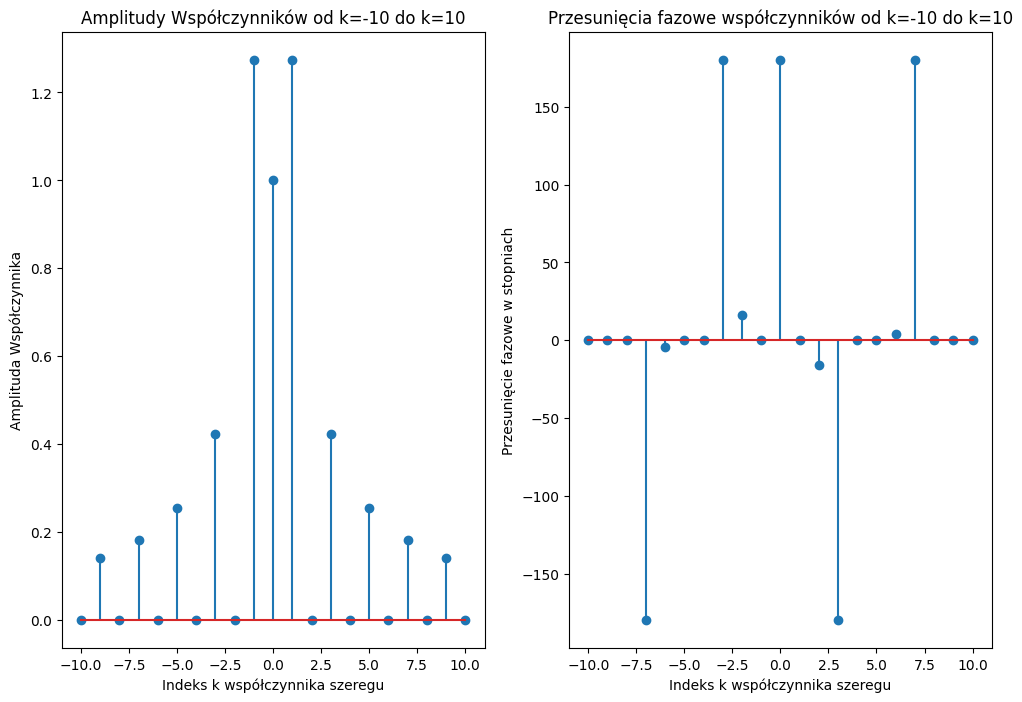

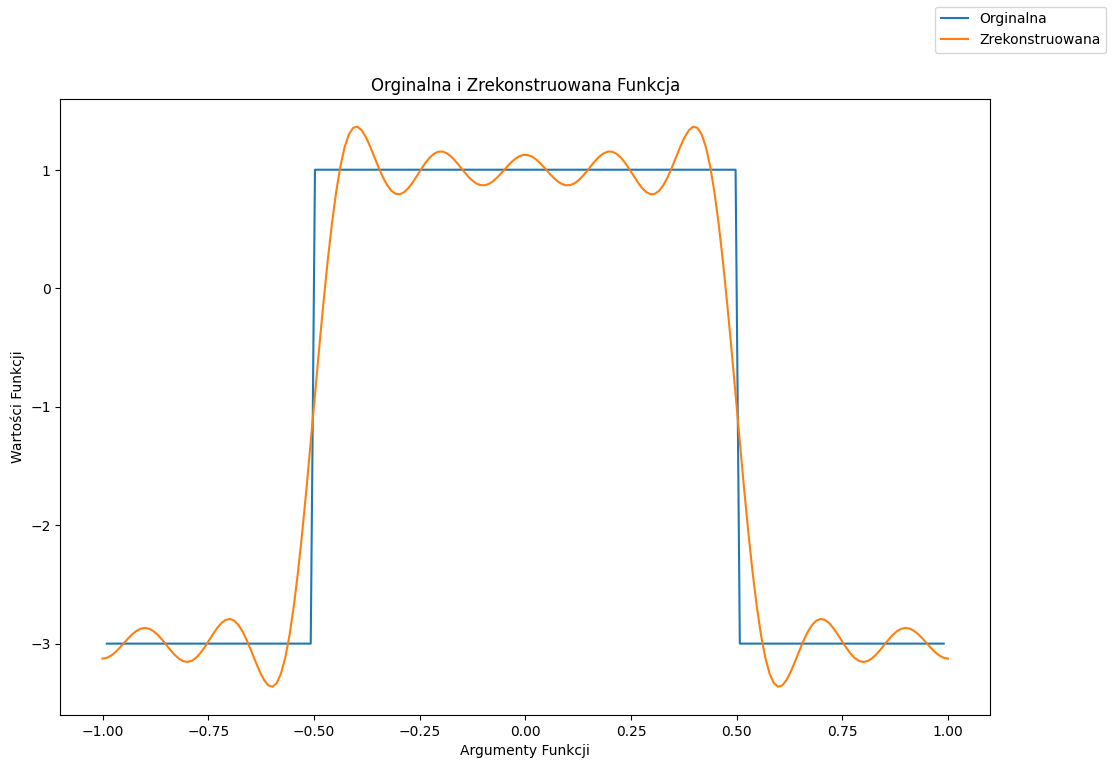

In [18]:
t = sp.Symbol('t', real = 'True')
k = sp.Symbol('k', real = 'True', nonzero = True, integer=True)

foo = sp.Piecewise((-N, (t>-1) & (t<-1/2)), (1, (t>-1/2) & (t<1/2)), (-N, (t>1/2) & (t<1)))

def wyznacz_wspolczynniki_szeregu(funkcja, początek_zakresu, koniec_zakresu):
    T = koniec_zakresu - początek_zakresu
    F0 = (1/T)*sp.integrate(funkcja, (t, początek_zakresu, koniec_zakresu))
    Fk = (1/T)*sp.integrate(funkcja*sp.exp(-sp.I*k*t*2*sp.pi/T), (t, początek_zakresu, koniec_zakresu))
    return F0, Fk

F0, Fk = wyznacz_wspolczynniki_szeregu(foo, -1, 1)
print('F0:')
display(F0)
print('Fk:')
display(Fk)


def oblicz_wartosci_wspolczynnikow(F0, Fk, min_k, max_k ):
    Fk_vector = []
    Fk_lam = sp.lambdify(k, Fk)
    for i in range(min_k, max_k+1, 1):
        if (i != 0):
            Fk_vector += [complex(Fk_lam(i))]
        else:
            Fk_vector += [complex(F0)]
    return Fk_vector

Fk_vector = oblicz_wartosci_wspolczynnikow(F0, Fk, -10, 10)
print("Wartości Współczynników od k=-10 do k=10")
display(Fk_vector)

zakres_k = np.arange(-10, 11, 1)
fig, ax = plt.subplots(1, 2)
## Wykres amplitud
ax[0].stem(zakres_k, np.abs(Fk_vector))
ax[0].set_title("Amplitudy Współczynników od k=-10 do k=10")
ax[0].set_xlabel("Indeks k współczynnika szeregu")
ax[0].set_ylabel("Amplituda Współczynnika")
## wykres faz
ax[1].stem(zakres_k, np.angle(Fk_vector, deg=True))
ax[1].set_title("Przesunięcia fazowe współczynników od k=-10 do k=10")
ax[1].set_xlabel("Indeks k współczynnika szeregu")
ax[1].set_ylabel("Przesunięcie fazowe w stopniach")
fig.show()

## Rekonstrukcja (dla wybitnych):
fig2, ax2 = plt.subplots(1, 1)
def rekonstrukcja_funkcji(F0, Fk, okres, min_k, max_k):
    funkcja_sympy = F0
    for i in range(min_k, max_k+1, 1):
        if (i != 0):
            funkcja_sympy += sp.lambdify(k, Fk)(i)*sp.exp(sp.I*i*2*sp.pi*t/okres)
    return funkcja_sympy

zrekonstruowana_funkcja_sympy = rekonstrukcja_funkcji(F0, Fk, 2, -10, 10)
funkcja_od_t = sp.lambdify(t, zrekonstruowana_funkcja_sympy)

probki_t = np.linspace(-1, 1, 200)
ax2.plot(probki_t, sp.lambdify(t, foo)(probki_t), label="Orginalna")
ax2.plot(probki_t, funkcja_od_t(probki_t).real, label="Zrekonstruowana")
ax2.set_title("Orginalna i Zrekonstruowana Funkcja")
ax2.set_xlabel("Argumenty Funkcji")
ax2.set_ylabel("Wartości Funkcji")
fig2.legend()
fig2.show()